# My Title 
## Jupiter Notebooks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.pi

3.141592653589793

In [3]:
x = np.arange(0,20*np.pi,0.1)   # start,stop,step
y = np.sin(x)
z = np.cos(x)
t = np.exp(x)

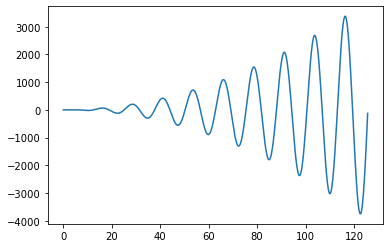

In [4]:
plt.plot(2*x,y*x**2)
plt.show()

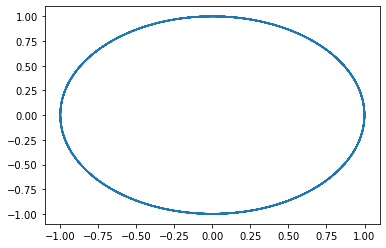

In [5]:
plt.plot(y,z)

## Fourier Series derivation

First we define the values of x from 0 to 2 pi. By now we are going to work with a function in the same period as Sin and Cos. 
x is now a np.array

In [6]:
my_step = 0.001
x=np.arange(0,2*np.pi,my_step)
#also can use np.linspace(start, end, number_of_steps)

### This is the function we are going to approximate


In [7]:
def my_func(x):
    return np.cos(3*x)+np.cos(6*x)+ np.sin(x)*(x-np.pi)**2+2



In [8]:
def a0(f,x):
    return (sum(f(x))-f(x)[0]/2 - f(x)[-1]/2 )*my_step/2/np.pi
        

In [9]:
a0(my_func,x)

1.999882056840296

In [10]:
def an(f,x,n):
    return (sum(f(x)*np.cos(n*x)) - f(x)[0]*np.cos(n*x[0])/2 - f(x)[-1]*np.cos(n*x[-1])/2)*my_step/np.pi
def bn(f,x,n):
    return (sum(f(x)*np.sin(n*x)) - f(x)[0]*np.sin(n*x[0])/2 - f(x)[-1]*np.sin(n*x[-1])/2)*my_step/np.pi

In [11]:
an(my_func, x, 1)

-0.00023588629841323928

In [12]:
bn(my_func, x, 1)

2.7898681554533877

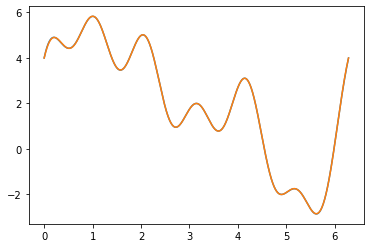

In [13]:
plt.plot(x,my_func(x))
plt.plot(x,a0(my_func,x)\
         +an(my_func,x,1)*np.cos(x)+bn(my_func,x,1)*np.sin(x)\
         +an(my_func,x,2)*np.cos(2*x)+bn(my_func,x,2)*np.sin(2*x)\
         +an(my_func,x,3)*np.cos(3*x)+bn(my_func,x,3)*np.sin(3*x)\
         +an(my_func,x,4)*np.cos(4*x)+bn(my_func,x,4)*np.sin(4*x)\
         +an(my_func,x,5)*np.cos(5*x)+bn(my_func,x,5)*np.sin(5*x)\
         +an(my_func,x,6)*np.cos(6*x)+bn(my_func,x,6)*np.sin(6*x)\
         +an(my_func,x,7)*np.cos(7*x)+bn(my_func,x,7)*np.sin(7*x)\
         +an(my_func,x,8)*np.cos(8*x)+bn(my_func,x,8)*np.sin(8*x)\
         +an(my_func,x,9)*np.cos(9*x)+bn(my_func,x,9)*np.sin(9*x)\
         +an(my_func,x,10)*np.cos(10*x)+bn(my_func,x,10)*np.sin(10*x)\
        )

In [14]:
print('a0:' + str(a0(my_func,x)))
for i in range(10):
    print('a' + str(i+1) + ':' + str(an(my_func,x,i+1)))
    print('b' + str(i+1) + ':' + str(bn(my_func,x,i+1)))
        

a0:1.999882056840296
a1:-0.00023588629841323928
b1:2.7898681554533877
a2:-0.00023588623542495585
b2:1.7777778212916753
a3:0.9997641138695684
b3:0.3750000652708238
a4:-0.00023588598344694657
b4:0.14222230924993443
a5:-0.00023588579446466538
b5:0.06944455322899969
a6:0.9997641144365168
b6:0.039183804010730364
a7:-0.0002358852905107601
b7:0.02430570785361805
a8:-0.0002358849755389724
b8:0.016125142560620972
a9:-0.00023588461857109854
b9:0.011250195811249884
a10:-0.0002358842196068855
b10:0.008162649972554671


### Now using the functions above to build a Fourrier series of n iterations

In [15]:
def F(f,x,n):
    Fourier = x * 0
    Fourier += a0(f,x)
    for i in range(n):
        Fourier += an(f,x,i+1)*np.cos((i+1)*x)+ bn(f,x,i+1)*np.sin((i+1)*x)
    return Fourier

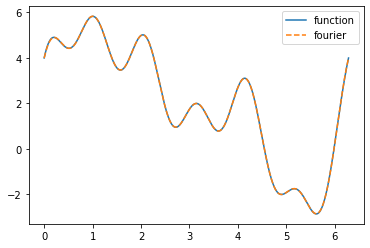

In [16]:
plt.plot(x,my_func(x))
plt.plot(x,F(my_func,x,10),linestyle='dashed')
plt.legend(['function','fourier'])

In [17]:
def F_tr(f,x,n):
    coef_nm=[]
    coef=[]
    coef.append(a0(f,x))
    coef_nm.append('a0')
    for i in range (n):
        coef_nm.append('a'+ str(i+1))
        coef.append(an(f,x,i+1))
        coef_nm.append('b'+ str(i+1))
        coef.append(bn(f,x,i+1))
   # plt.bar(coef_nm,coef)
    return pd.DataFrame(coef,coef_nm) 

<BarContainer object of 21 artists>

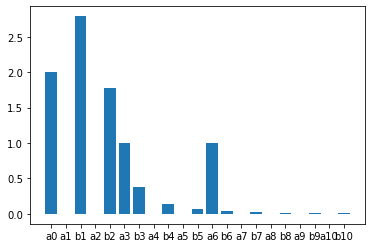

In [18]:
data_1=F_tr(my_func,x,10)
plt.bar(data_1.index,data_1[0])

In [19]:
def My_fun2(x):
    my_Freq = 4
    y=np.empty(x.size)
    for i in range(x.size):
        if np.cos(x[i] * my_Freq) > 0.99:
            y[i]=1
        else:
            y[i]=0
    return y    
        

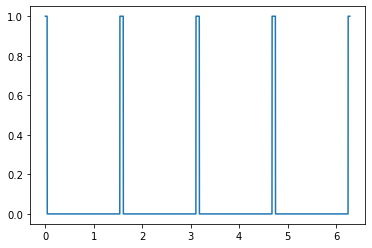

In [20]:
plt.plot(x,My_fun2(x))

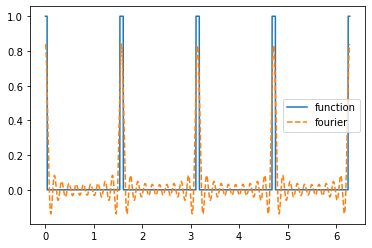

In [21]:
plt.plot(x,My_fun2(x))
plt.plot(x,F(My_fun2,x,40),linestyle='dashed')
plt.legend(['function','fourier'])

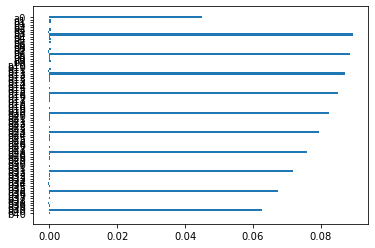

In [22]:
my_fig, my_graph = plt.subplots()
my_graph.barh(F_tr(My_fun2,x,40).index,F_tr(My_fun2,x,40)[0],  height=.9)
my_graph.invert_yaxis()
plt.show()

In [23]:
F_tr(My_fun2,x,40)

,0
a0,4.488169e-02
a1,3.159461e-04
b1,3.180824e-04
a2,-1.473154e-07
b2,-2.245165e-05
...,...
b38,-3.098024e-04
a39,7.208657e-05
b39,-6.170121e-05
a40,6.279068e-02


In [24]:
def my_func3(x):
    return np.sin(3.5*x)


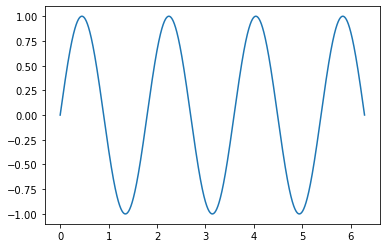

In [25]:
plt.plot(x,my_func3(x))

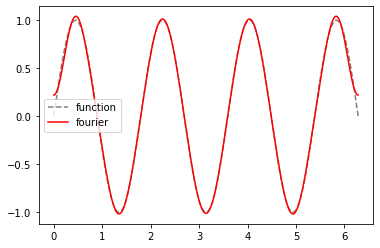

In [26]:
plt.plot(x,my_func3(x),color='grey', linestyle='dashed')
plt.plot(x,F(my_func3,x,10),linestyle='solid',color='red')
plt.legend(['function','fourier'])

In [27]:
Coefs = F_tr(my_func3,x,10)

<AxesSubplot:>

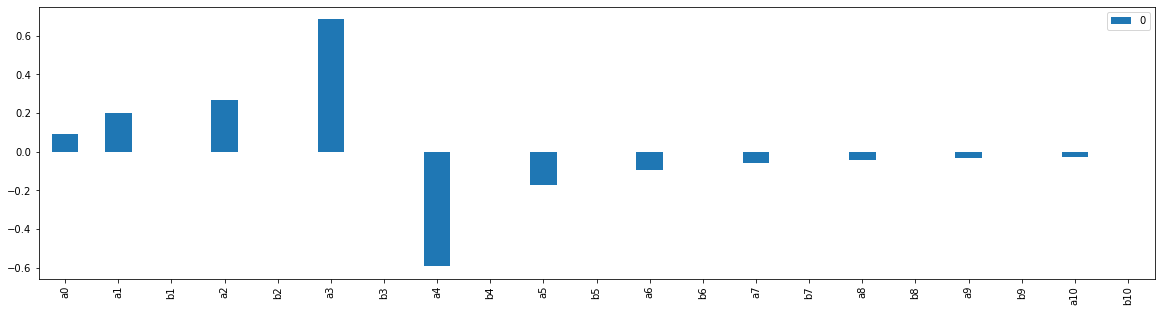

In [28]:
Coefs.plot(kind='bar',figsize=(20,5))

In [29]:
abs(Coefs).sort_values(0, ascending=False).T


,a3,a4,a2,a1,a5,a6,a0,a7,a8,a9,...,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1
0,0.68559,0.594179,0.270081,0.198059,0.174759,0.093818,0.090946,0.060631,0.043057,0.03241,...,3.677111e-10,3.309397e-10,2.941687e-10,2.573975e-10,2.206263e-10,1.838553e-10,1.470852e-10,1.103141e-10,7.354235e-11,3.677071e-11


In [30]:
Coefs.T

,a0,a1,b1,a2,b2,a3,b3,a4,b4,a5,...,a6,b6,a7,b7,a8,b8,a9,b9,a10,b10
0,0.090946,0.198059,3.677071e-11,0.270081,7.354235e-11,0.68559,1.103141e-10,-0.594179,1.470852e-10,-0.174759,...,-0.093818,2.206263e-10,-0.060631,2.573975e-10,-0.043057,2.941687e-10,-0.03241,3.309397e-10,-0.025392,3.677111e-10


In [31]:
index_rank=abs(Coefs).sort_values(0, ascending=False).index.values
frec_rank = []
for c in index_rank:
    frec_rank.append(int(c[1:]))

In [32]:
frec_rank[:4]

[3, 4, 2, 1]

In [33]:
np.lcm.reduce(frec_rank[:4])

12

In [34]:
np.lcm.reduce([3,21,2])

42

# Playing witn FTT

In [256]:
T = 1
Samples = 2**11

In [257]:
t = np.linspace(0,T,Samples)

In [258]:
f0 = T/Samples
fmax = round(Samples/2)

In [259]:
fmax

1024

In [260]:
f = np.sin(440*2*np.pi*t)+np.cos(450*2*np.pi*t)

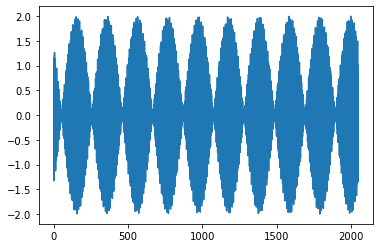

In [261]:
plt.plot(f)

In [262]:
Tf = np.fft.fft(f)
Freqs = abs(Tf[0:round(Samples/2)])

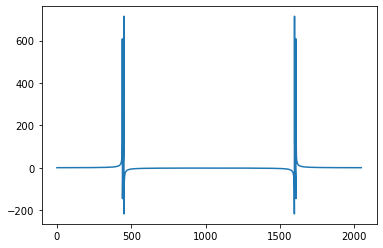

In [263]:
plt.plot(np.real(Tf))

In [264]:
pd.DataFrame(np.real(Tf[0:round(Samples/2)])).nlargest(10,0)

,0
450,715.066571
440,608.240127
439,119.114417
449,116.719773
438,70.615927
448,55.749272
437,51.738734
436,41.488251
435,34.954496
447,30.945122


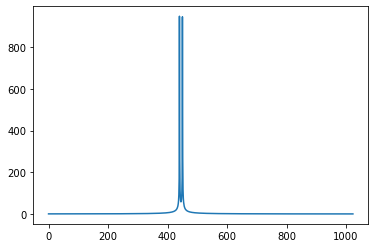

In [265]:
plt.plot(Freqs)

In [266]:
pd.DataFrame(Freqs).nlargest(10,0)

,0
440,947.834985
450,945.077805
451,266.513620
441,260.868011
449,172.155187
439,168.443596
452,117.640446
442,117.290974
448,97.529037
438,93.292655
